## Data analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("entropy_stratified.csv")
labels = pd.read_csv("labels_stratified.csv")

['Rotor-0',
 'Noload',
 'A&C&B10',
 'A50',
 'A&B50',
 'A&C30',
 'A&C10',
 'A10',
 'A&C&B30',
 'A30',
 'Fan']

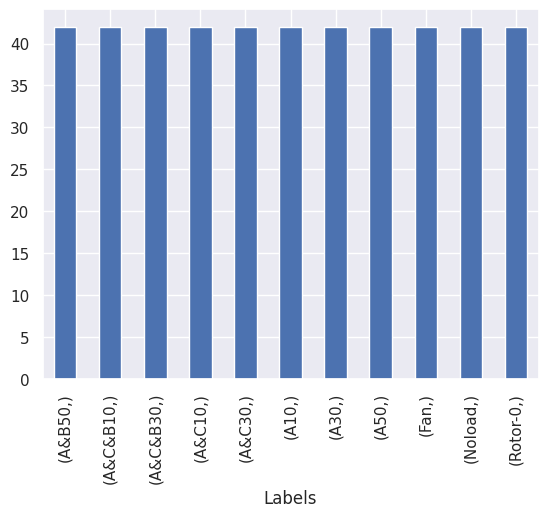

In [7]:
sns.set_theme()
labels.value_counts().plot(kind="bar")
columns = list(labels["Labels"].unique())
(columns)

## Show the signals

In [13]:
signals = []
for column in columns:
    mask = (column == labels["Labels"])
    signal = df.loc[mask]
    signal = signal.iloc[0]
    signals.append(signal)
signals = np.array(signals)

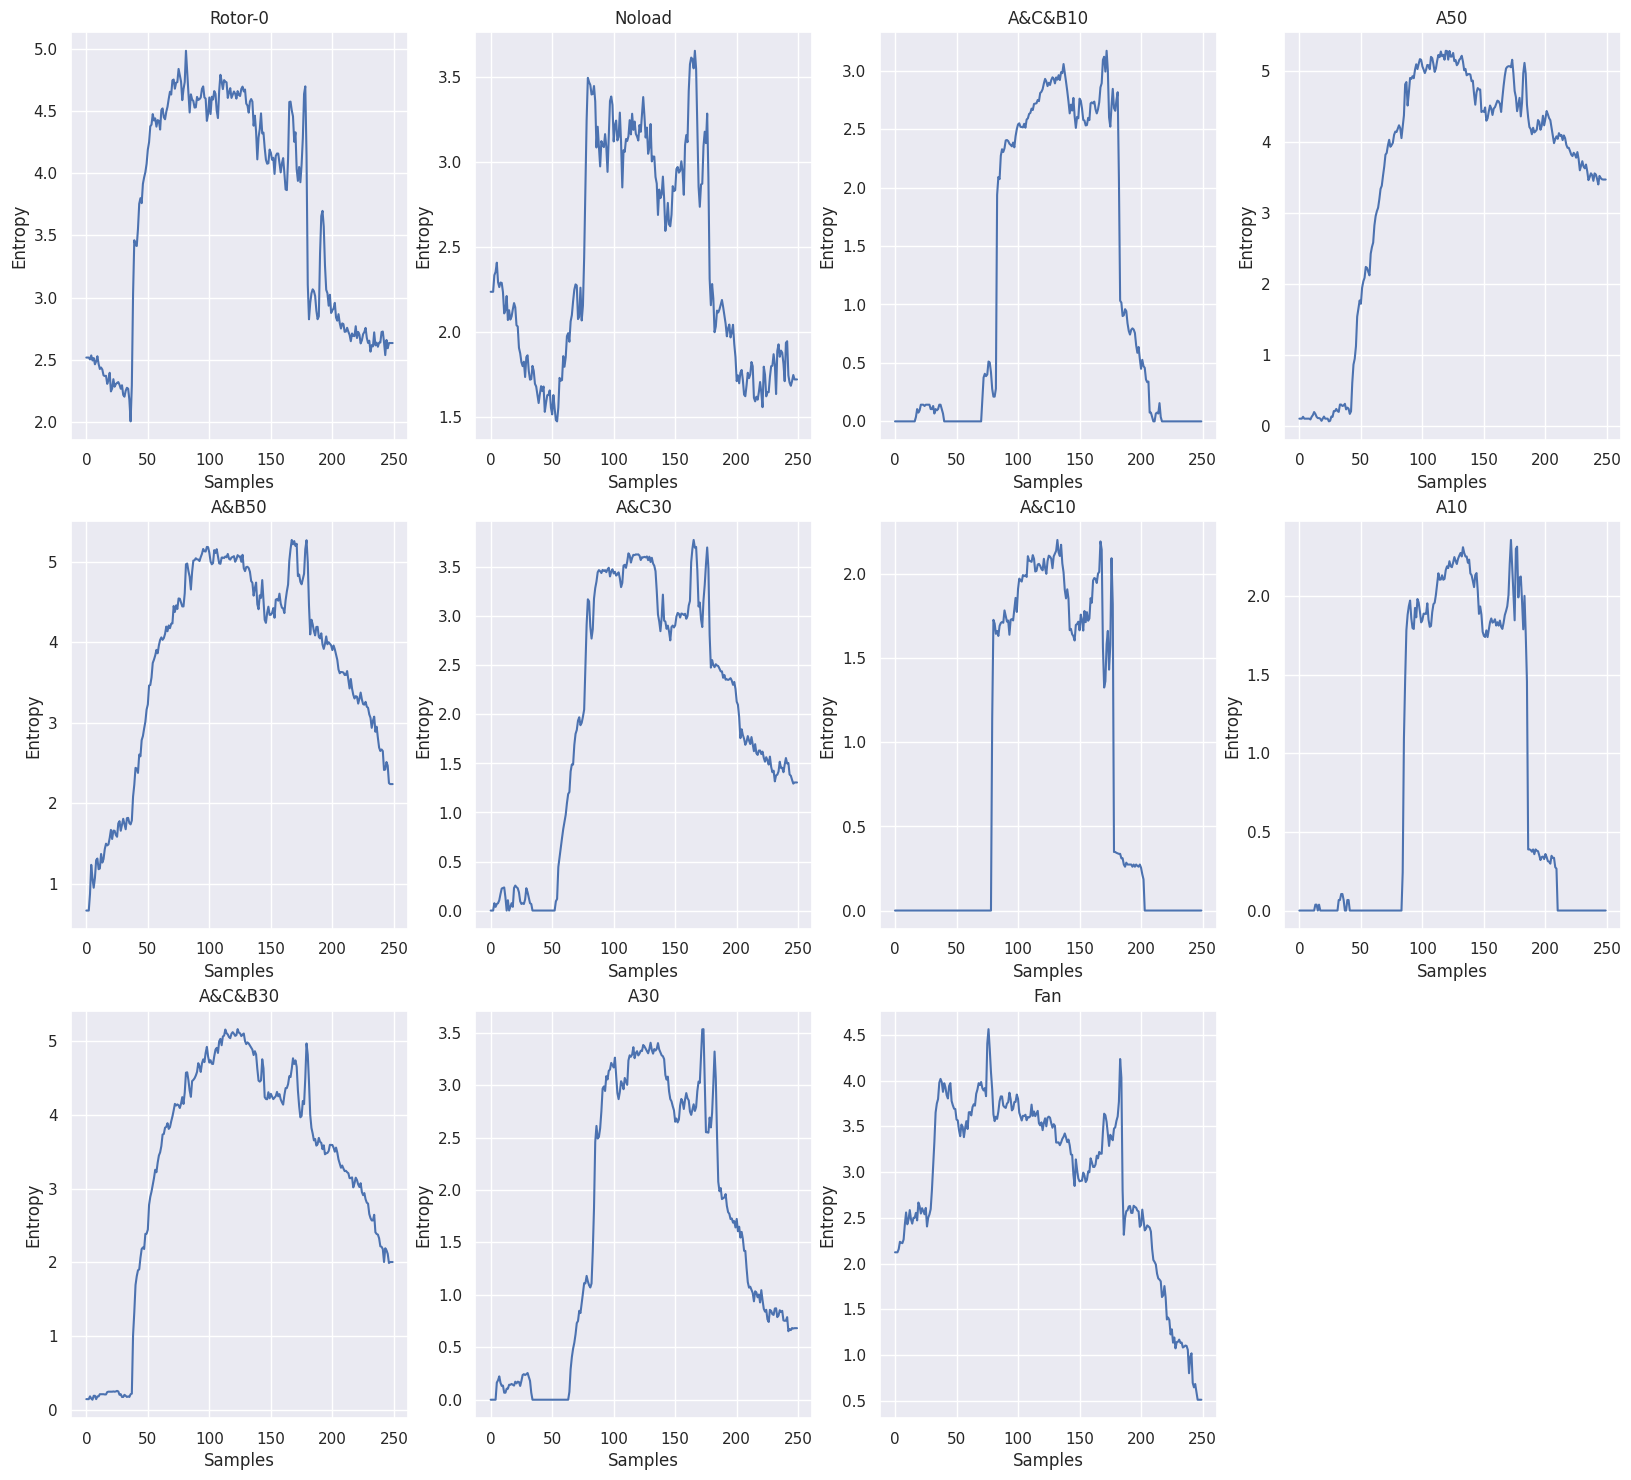

In [18]:
# Plot the figures
plt.figure(figsize=(20, 18))
for i, column in enumerate(columns):
    plt.subplot(3, 4, i+1)
    sns.lineplot(x=range(0, signals.shape[1]), y=signals[i])
    plt.title(column)
    plt.xlabel("Samples")
    plt.ylabel("Entropy")
plt.show()

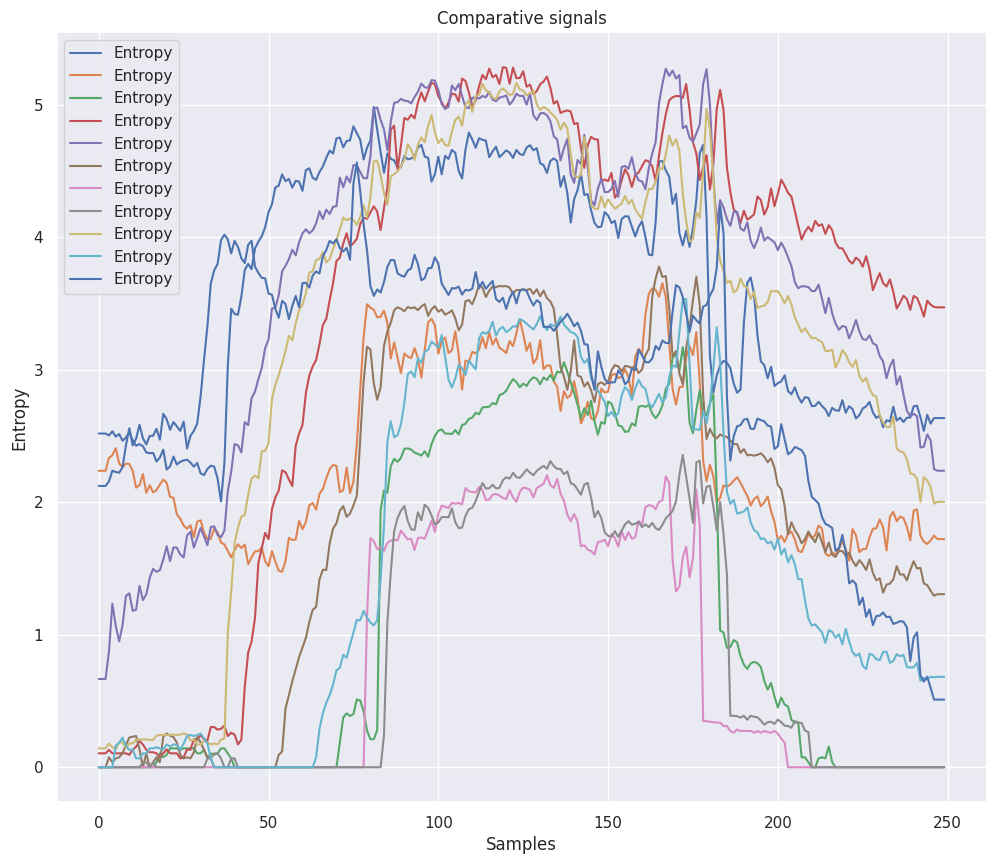

In [25]:
plt.figure(figsize=(12, 10))
for i in range(len(signals)):
    plt.plot(signals[i], "-", label="Entropy")
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Entropy")
plt.title("Comparative signals")
plt.show()

## Check the max values

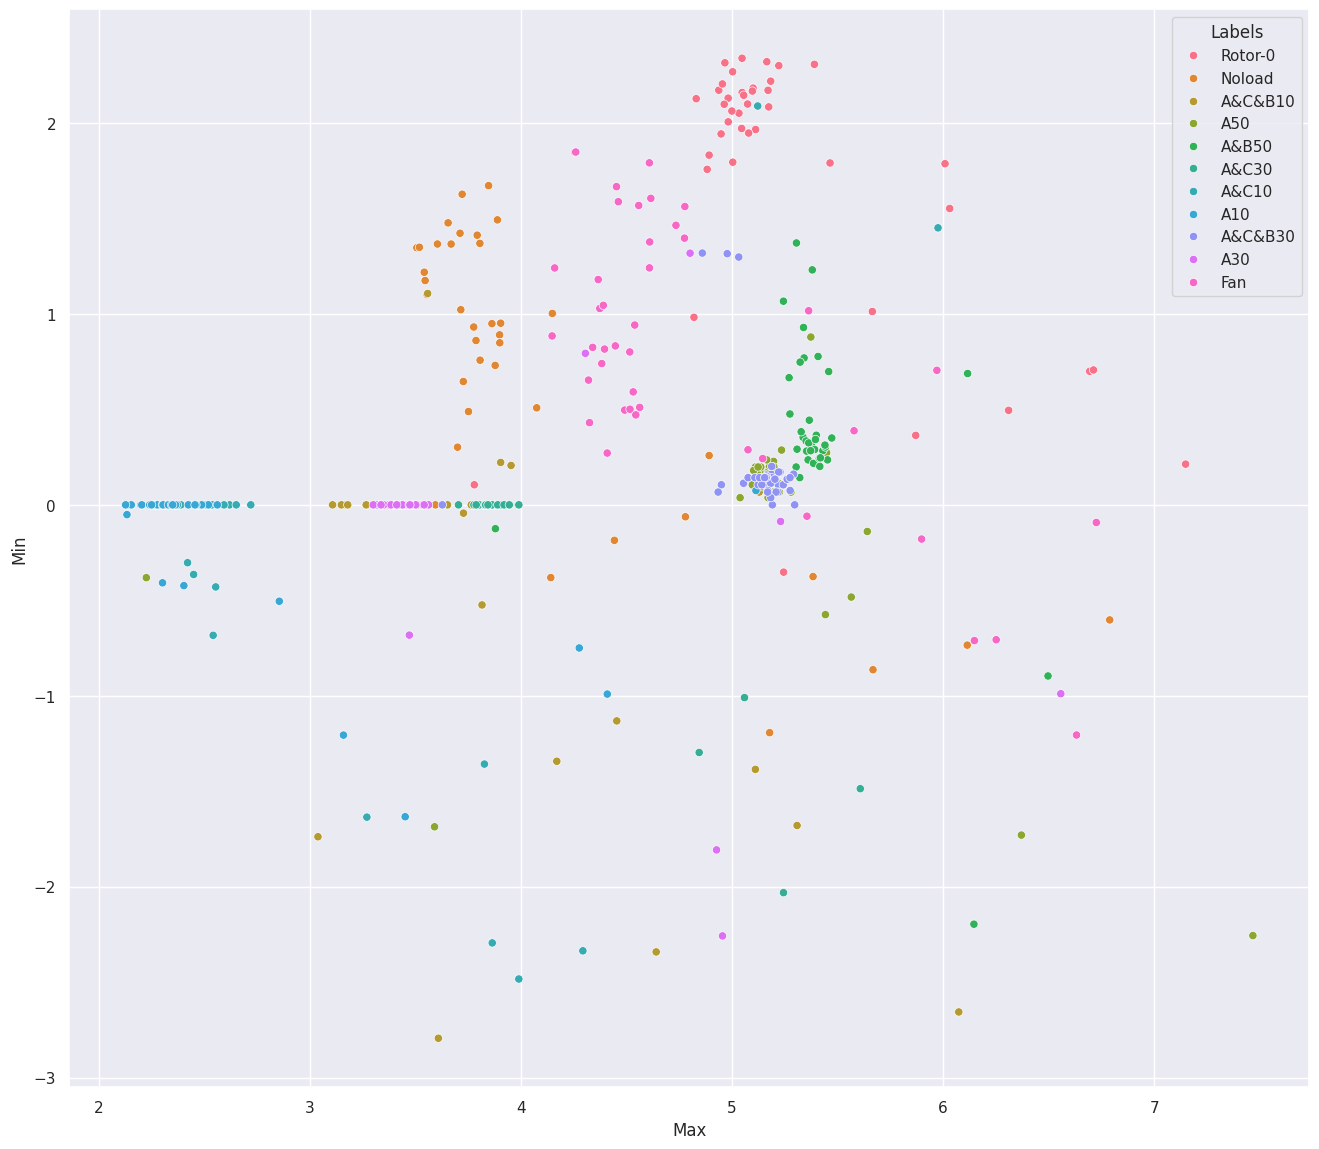

In [37]:
max_values = df.max(axis=1).values
min_values = df.min(axis=1).values
values = pd.DataFrame({"Max":max_values, "Min":min_values})
values["Labels"] = labels["Labels"]
plt.figure(figsize=(16, 14))
sns.scatterplot(values, x="Max", y="Min", hue="Labels")
plt.show()

In [38]:
# Calculate the kurtosis
from scipy.stats import kurtosis
kurtosis_values = kurtosis(df.values, axis=1)
kurtosis_values = pd.DataFrame(kurtosis_values, columns=["Kurtosis"])
kurtosis_values["Labels"] = labels["Labels"]
kurtosis_values.head(5)

,Kurtosis,Labels
0,-1.649859,Rotor-0
1,-1.684051,Rotor-0
2,-1.625508,Rotor-0
3,-1.717736,Rotor-0
4,-1.634850,Rotor-0


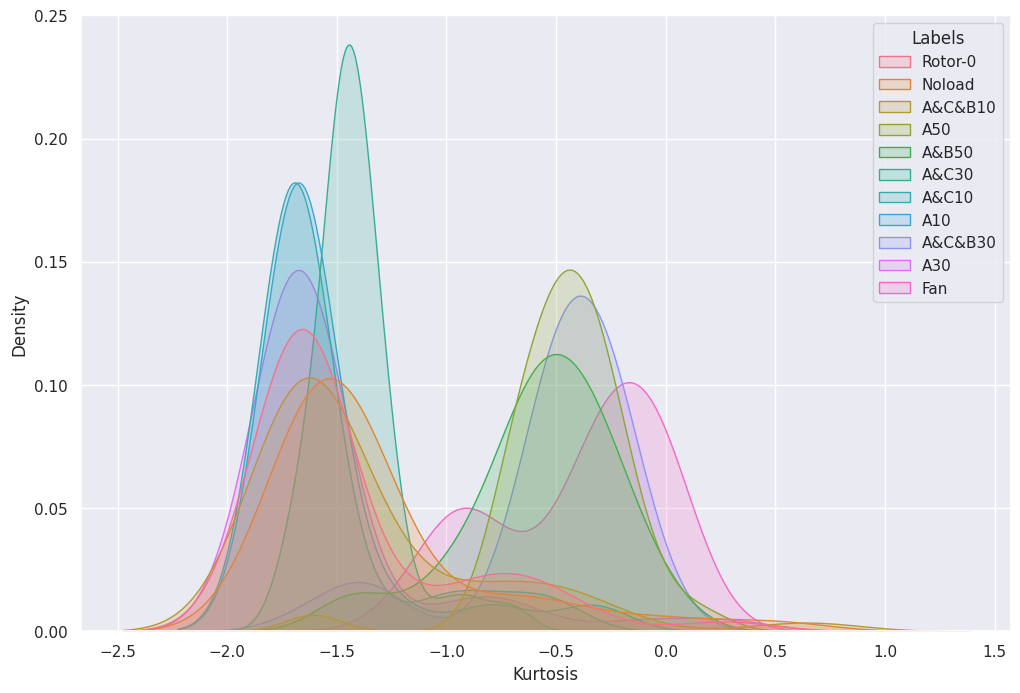

In [42]:
# Plot the kurtosis
plt.figure(figsize=(12, 8))
sns.kdeplot(kurtosis_values, x="Kurtosis", hue="Labels", fill=True, alpha=0.2)
plt.show()

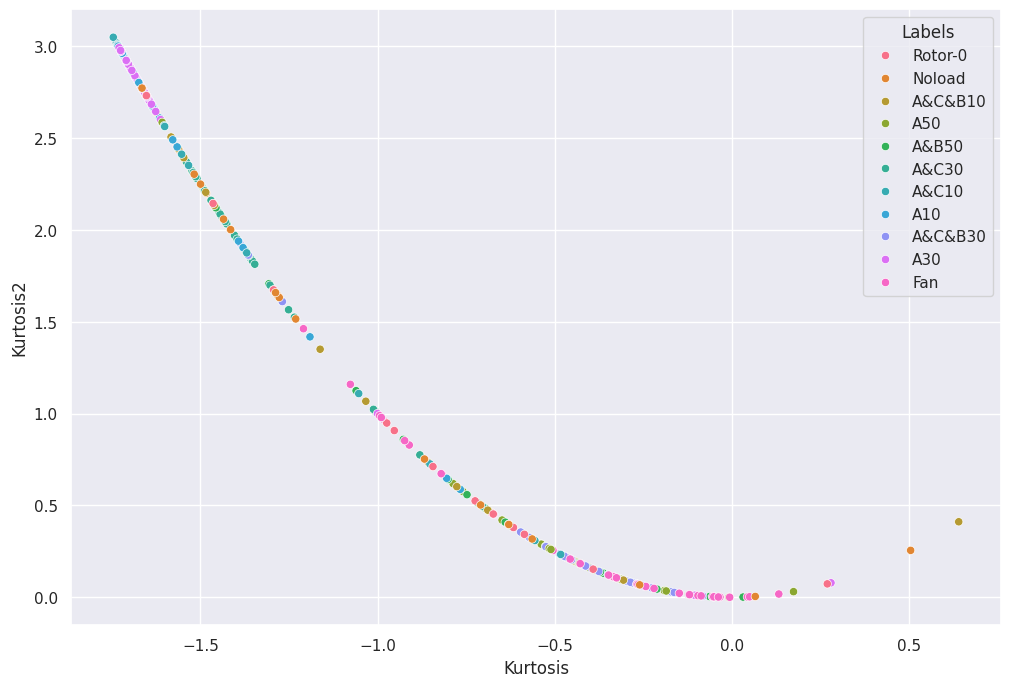

In [43]:
kurtosis_values["Kurtosis2"] = kurtosis_values["Kurtosis"].map(lambda s: s**2)
plt.figure(figsize=(12, 8))
sns.scatterplot(kurtosis_values, x="Kurtosis", y="Kurtosis2", hue="Labels")
plt.show()

In [51]:
columns = ["Fan", "A&C&B30", "A50", "A&B50", "Noload"]
mask = (labels["Labels"] == columns[0]) | (labels["Labels"] == columns[1]) | (labels["Labels"] == columns[2]) |\
        (labels["Labels"] == columns[3]) | (labels["Labels"] == columns[4])
df_final = kurtosis_values.loc[mask]

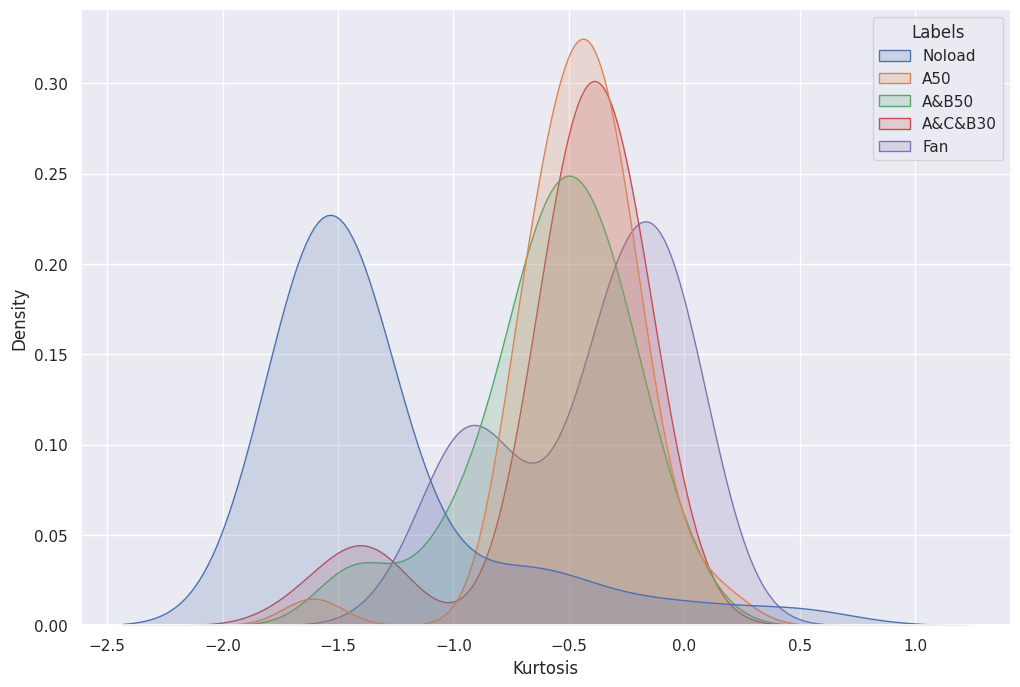

In [52]:
plt.figure(figsize=(12, 8))
sns.kdeplot(df_final, x='Kurtosis', hue="Labels", fill=True, alpha=0.2)
plt.show()

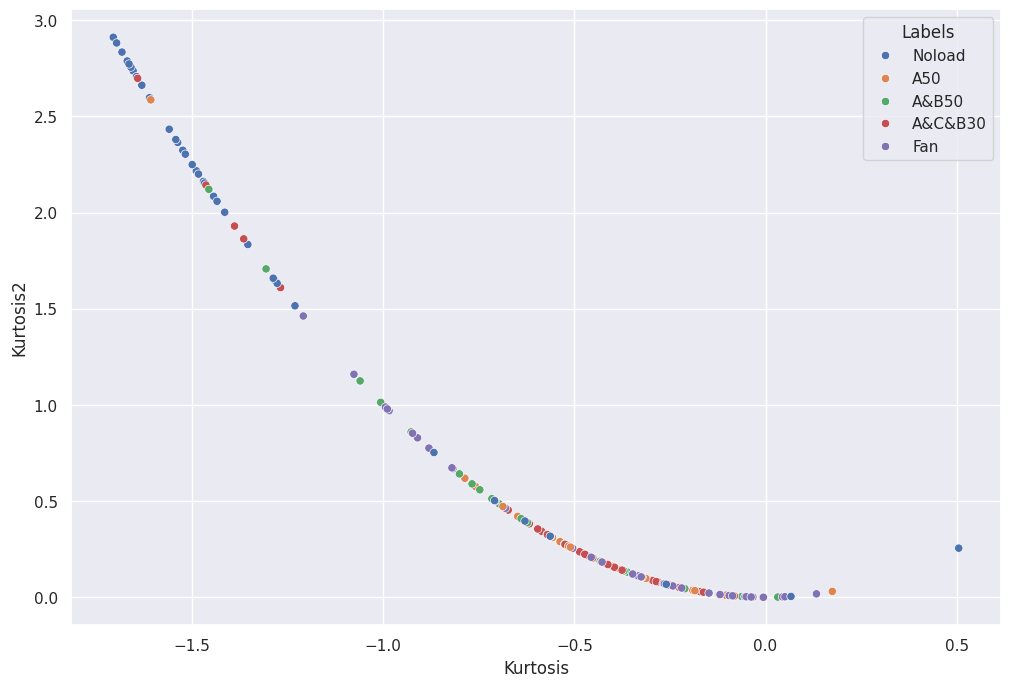

In [55]:
plt.figure(figsize=(12, 8))
sns.scatterplot(df_final, x="Kurtosis", y="Kurtosis2", hue="Labels")
plt.show()

In [57]:
df_final.to_csv("kurtosis.csv", index=False)

## More analysis

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("entropy_stratified.csv")
labels = pd.read_csv("labels_stratified.csv")

In [3]:
mask = (labels["Labels"] == "Noload") | (labels["Labels"] == "A&C&B10") |\
        (labels["Labels"] == "A50") | (labels["Labels"] == "A&C10") |\
        (labels["Labels"] == "Rotor-0")
        
df_median = df.loc[mask]
labels_median = labels["Labels"].loc[mask]
df_median.head()
labels_median.head()

30    Noload
31    Noload
32    Noload
33    Noload
34    Noload
Name: Labels, dtype: object

<Axes: xlabel='Median', ylabel='Density'>

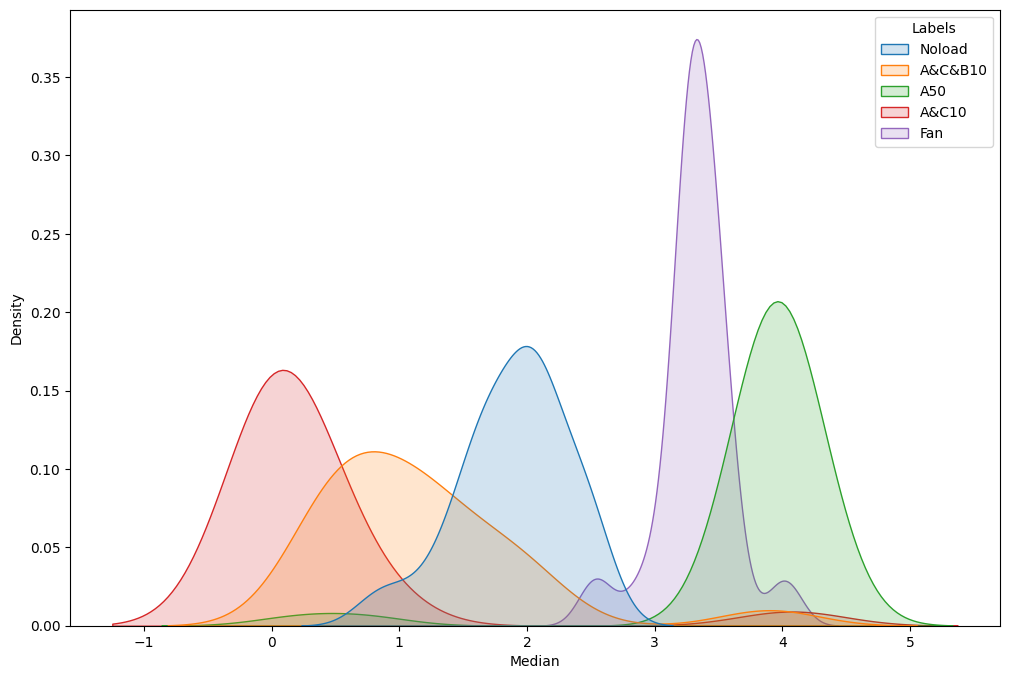

In [4]:
median_values = df_median.median(axis=1)
median_values = pd.DataFrame(median_values, columns=["Median"])
median_values = pd.concat([median_values, pd.DataFrame({"Median": median_values.iloc[-1].values})], axis=0)
median_values = pd.concat([median_values, pd.DataFrame({"Median": median_values.iloc[-3].values})], axis=0)
median_values["Labels"] = labels_median.values
plt.figure(figsize=(12,8))
sns.kdeplot(median_values, x="Median", hue="Labels", fill=True, alpha=0.2)

<Axes: xlabel='Labels'>

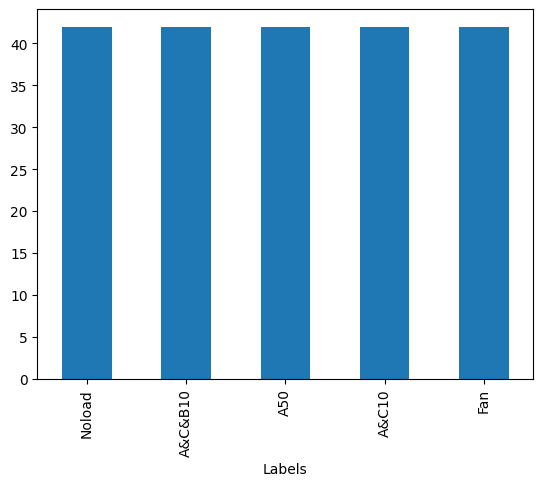

In [5]:
median_values["Labels"].value_counts().plot(kind="bar")

In [44]:
median_values.to_csv("median.csv", index=False)
labels_median.to_csv("labels_median.csv", index=False)

## More analysis

In [2]:
df = pd.read_csv("entropy_stratified2.csv")
labels = pd.read_csv("labels_stratified2.csv")

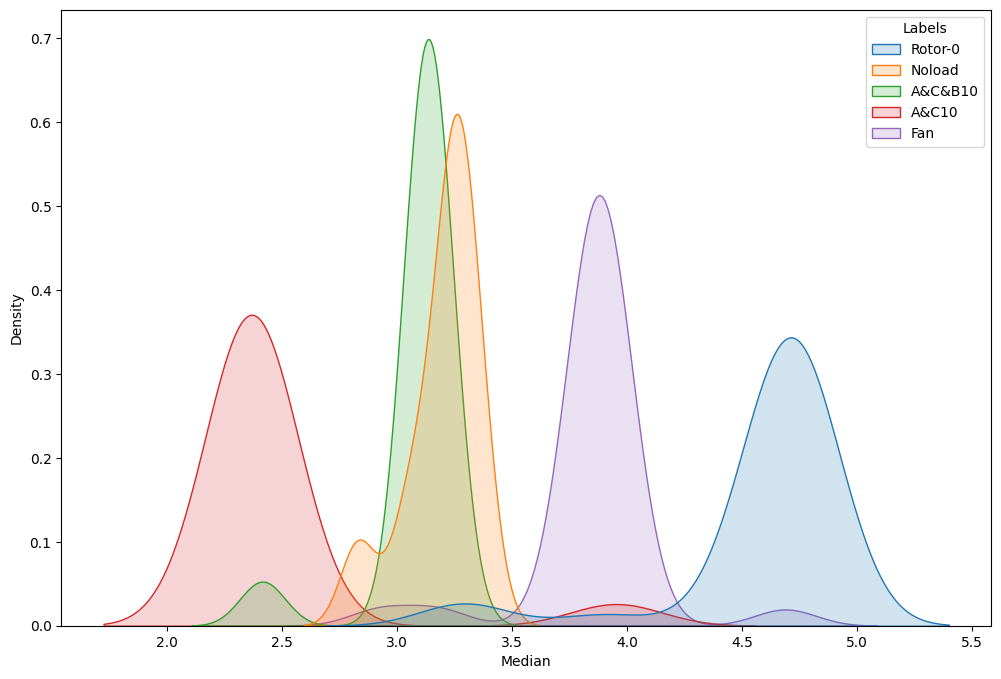

In [7]:
median_values = df.median(axis=1)
median_values = pd.DataFrame(median_values, columns=["Median"])
median_values = pd.concat([median_values, pd.DataFrame({"Median": median_values.iloc[-1].values})], axis=0, ignore_index=True)
median_values = pd.concat([median_values, pd.DataFrame({"Median": median_values.iloc[-3].values})], axis=0, ignore_index=True)
median_values["Labels"] = labels["Labels"].values
plt.figure(figsize=(12,8))
sns.kdeplot(median_values, x="Median", hue="Labels", fill=True, alpha=0.2)
plt.show()

In [11]:
columns = list(labels["Labels"].unique())
signals = []
for column in columns:
    mask = (column == labels["Labels"])
    signal = df.loc[mask]
    signal = signal.iloc[0]
    signals.append(signal)
signals = np.array(signals)

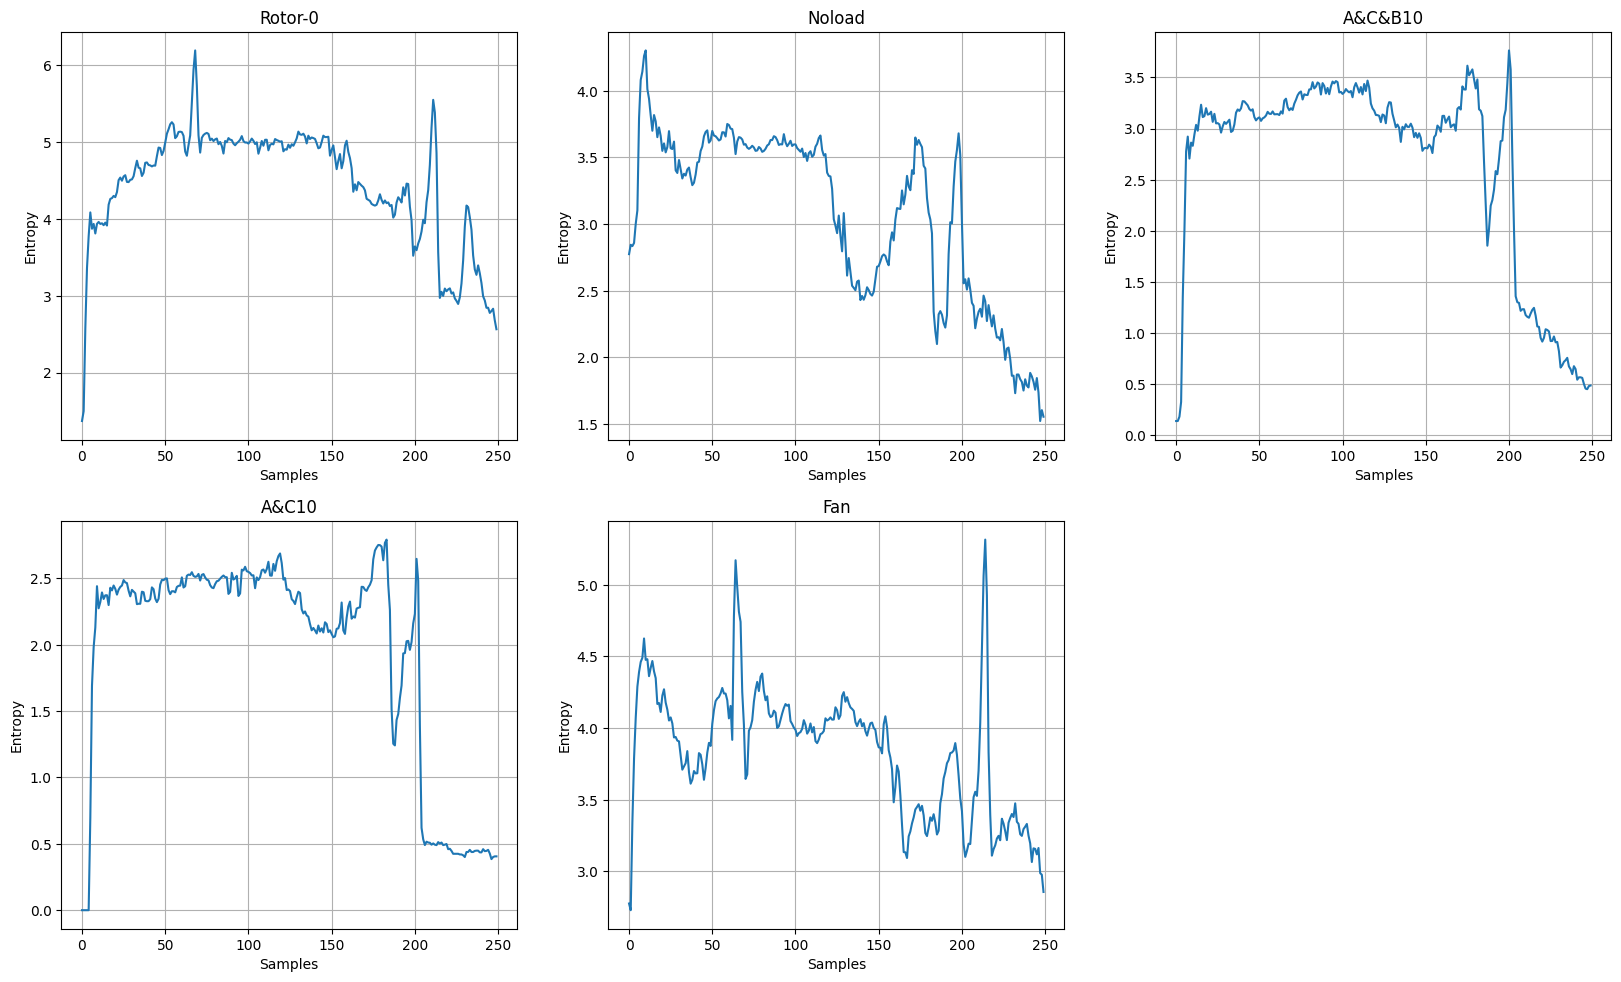

In [12]:
plt.figure(figsize=(20, 18))
for i, column in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.lineplot(x=range(0, signals.shape[1]), y=signals[i])
    plt.title(column)
    plt.xlabel("Samples")
    plt.ylabel("Entropy")
    plt.grid(True)
plt.show()

In [14]:
median_values.to_csv("median2.csv", index=False)
labels.to_csv("labels_median2.csv", index=False)